In [18]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the dataset

df = pd.read_csv('Data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [65]:
# 1 is Yes, 0 is No

In [138]:
df.shape

(110527, 12)

Data Pre-Processing:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# dropping some columns which have no significance
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood','Scholarship'], axis=1, inplace=True)

In [6]:
#modifying the date and time into standard form
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [7]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

for the schedule day and appointment day storing the weekdays only into a variable 

In [8]:
# 5 is Saturday, 6 is Sunday 

df['sch_weekday'] = df['ScheduledDay'].dt.dayofweek

In [9]:
df['app_weekday'] = df['AppointmentDay'].dt.dayofweek

In [10]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

df['Age_group'] = pd.cut(df.Age, range(1, 130, 20), right=False, labels=labels)

In [11]:
df.drop(['Age'], axis=1, inplace=True)

In [12]:
#changing the name of some cloumns
df= df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'})

In [13]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'No_Show', 'sch_weekday',
       'app_weekday', 'Age_group'],
      dtype='object')

EDA:

In [14]:
df.describe()

,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


In [154]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [113]:
Hypertension= pd.DataFrame(df['Hypertension']).value_counts()
Diabetes= pd.DataFrame(df['Diabetes']).value_counts()
Alcoholism= pd.DataFrame(df['Alcoholism']).value_counts()
Handicap= pd.DataFrame(df['Handicap']).value_counts()
print(f'Patients with Hypertension: {Hypertension[1]}')
print(f'Patients with Diabetes: {Diabetes[1]}')
print(f'Patients with Alcoholism: {Alcoholism[1]}')
print(f'Patients with Handicap: {Handicap[1]}')
print(type(Hypertension))

Patients with Hypertension: 21801
Patients with Diabetes: 7943
Patients with Alcoholism: 3360
Patients with Handicap: 2042
<class 'pandas.core.series.Series'>


In [146]:
# Patients without Hypertension, Diabetes, Alcoholism and Handicap:
b= 21801+7943+3360+2042
normal= df.shape[0] -  b
normal

75381

([<matplotlib.patches.Wedge at 0x225aabdba60>,
 [Text(-0.5952750679428286, -0.9250122126143314, 'Normal People'),
  Text(0.21044452477782088, 1.0796819448296047, 'Hypertension'),
  Text(0.9474933862372784, 0.5587989647776879, 'Diabetes'),
  Text(1.0754688681514397, 0.23101236684875, 'Alcoholism'),
  Text(1.0981476832096753, 0.06380960633966132, 'Handicap')],
 [Text(-0.3246954916051792, -0.5045521159714534, '68.20%'),
  Text(0.1147879226060841, 0.5889174244525115, '19.72%'),
  Text(0.5168145743112428, 0.3047994353332843, '7.19%'),
  Text(0.5866193826280579, 0.12600674555386362, '3.04%'),
  Text(0.5989896453870955, 0.034805239821633444, '1.85%')])

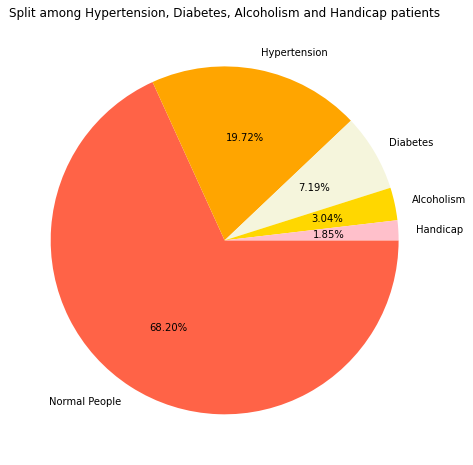

In [153]:
# Split among Hypertension, Diabetes, Alcoholism and Handicap patients
plt.figure(figsize=(15,8))
size=[normal, 21801, 7943, 3360, 2042]
colors=['tomato','orange','beige','gold', 'pink']
labels=['Normal People','Hypertension','Diabetes','Alcoholism','Handicap']
plt.title('Split among Hypertension, Diabetes, Alcoholism and Handicap patients')
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', counterclock= False)

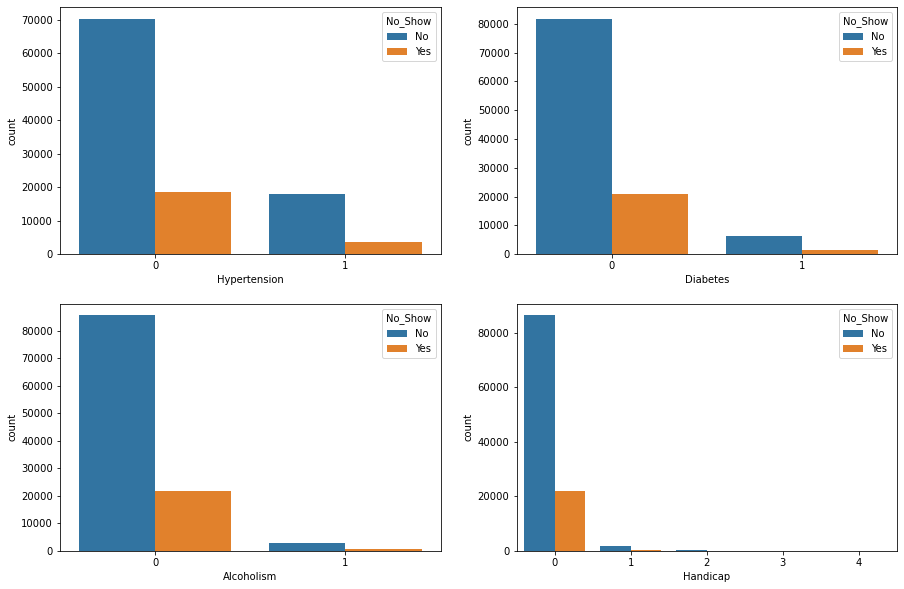

In [173]:
a=['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
plt.figure(figsize=(15,10))
for i in range(4) :
    ax = plt.subplot(2, 2,i+1)
    sns.countplot(x =a[i], data = df,hue='No_Show', ax=ax)

In [161]:
df['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [25]:
df['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

In [ ]:
plt.scatter(year,salary, s=population, c='r')
plt.title('Bubble chart')
plt.show()

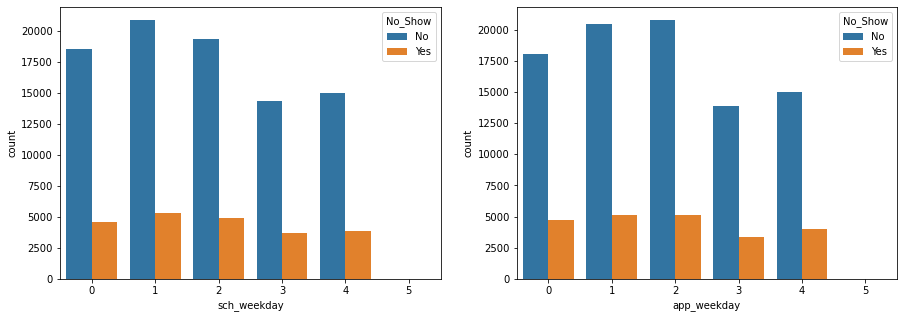

In [158]:
a=['sch_weekday', 'app_weekday']
plt.figure(figsize=(15,5))
for i in range(2) :
    ax = plt.subplot(1, 2,i+1)
    sns.countplot(x =a[i], data = df,hue='No_Show', ax=ax)

In [60]:
# calculating the % of patients who did not show up for appointment
100*df['No_Show'].value_counts()/len(df['No_Show'])

No     79.806744
Yes    20.193256
Name: No_Show, dtype: float64

In [64]:
df['No_Show'].value_counts()

No     88208
Yes    22319
Name: No_Show, dtype: int64

In [156]:
df['Age_group'].value_counts()

41 - 61      30081
21 - 41      28835
1 - 21       28309
61 - 81      16910
81 - 101      2845
101 - 121        7
Name: Age_group, dtype: int64

<AxesSubplot:xlabel='Age_group', ylabel='count'>

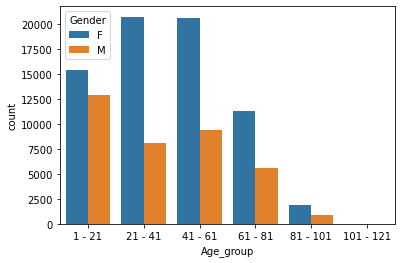

In [155]:
sns.countplot(x='Age_group', data=df, hue= 'Gender')

In [20]:
df['No_Show'] = np.where(df.No_Show == 'Yes',1,0)

In [21]:
df.No_Show.value_counts()

0    88208
1    22319
Name: No_Show, dtype: int64

 ## Findings

1.	Female patients have taken more appointments than male patients.
3.	There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
4.	There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
5.	There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
6.	There are no appointments on sunday and on saturday appointments are very less in comparision to other week days.
